Qiskit Aer 的测试

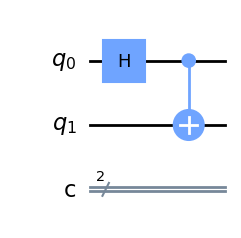

In [9]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit import Aer

# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
# Add a H gate on qubit 0
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)

# Draw the circuit
circuit.draw('mpl')

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


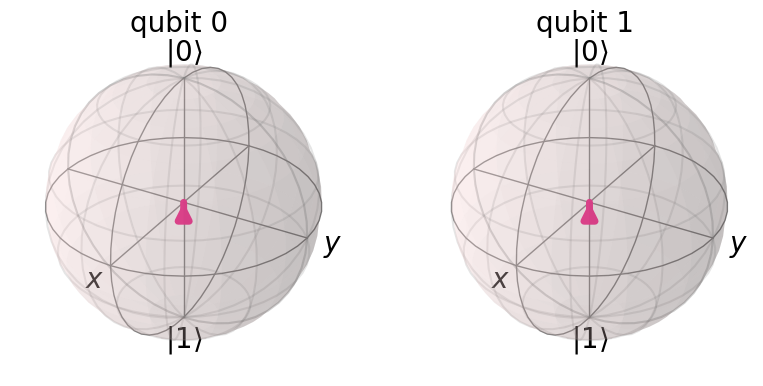

In [15]:
from qiskit.visualization import plot_bloch_multivector

vector = Aer.get_backend('statevector_simulator').run(circuit).result().get_statevector()
print(vector)
plot_bloch_multivector(vector)

In [16]:
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])

# Use Aer's qasm_simulator
simulator = Aer.get_backend('qasm_simulator')

# compile the circuit down to low-level QASM instructions
# supported by the backend (not needed for simple circuits)
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the qasm simulator
job = simulator.run(compiled_circuit, shots=1000)

# Grab results from the job
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)
print("\nTotal count for 00 and 11 are:",counts)


Total count for 00 and 11 are: {'00': 479, '11': 521}


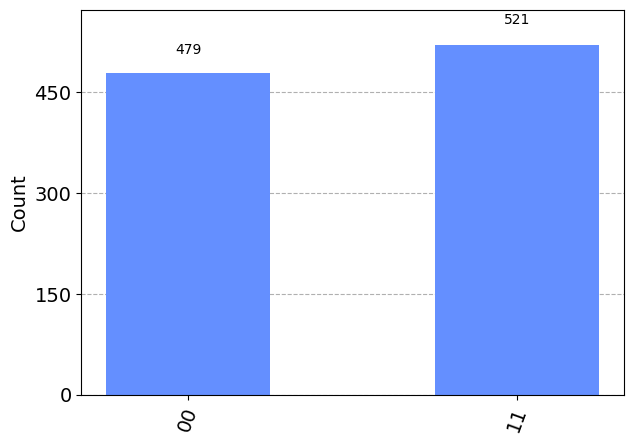

In [17]:
from qiskit.visualization import plot_histogram

# Plot a histogram
plot_histogram(counts)